# Group 2 - Lego Assignment

This notebook performs data loading, merging, and analysis on multiple tables provided in an Excel file.

The focus is on creating visualizations and saving them for inclusion in report.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Switch off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the Excel file
file_path = 'ASDA_assignment_2.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheets, skipping "Original sheet" and select 5 others for analysis
sheet_names = [sheet for sheet in xls.sheet_names if sheet != "Original sheet"]
dataframes = [xls.parse(sheet) for sheet in sheet_names]

# Combine DataFrames based on common keys
main_table, colour_table, shape_info_table, age_group_table, height_table = dataframes

# Merging the tables on identified keys
combined_df = pd.merge(main_table, colour_table, on='colour_id', how='left')
combined_df = pd.merge(combined_df, shape_info_table, on='sof_id', how='left')
combined_df = pd.merge(combined_df, age_group_table, on='age_id', how='left')
combined_df = pd.merge(combined_df, height_table, on='height_id', how='left')

combined_df.head()

,unique_id,nod,colour_id,sof_id,height_id,age_id,units,colour_name,colour_fill,colour_code,shape,type,age_group,height
0,CB-YL1-4-CL,4,YL1,CB,1,CL,1,Yellow,NaN,#ffff00,Cube,Brick,Classical,Normal
1,CB-YL1-4-CL,4,YL1,CB,1,CL,1,Yellow,NaN,#ffff00,Square,Brick,Classical,Normal
2,CD-YL1-2-CL,2,YL1,CD,1,CL,2,Yellow,NaN,#ffff00,Cuboid,Brick,Classical,Normal
3,CD-YL1-2-CL,2,YL1,CD,1,CL,2,Yellow,NaN,#ffff00,Rectangle,Brick,Classical,Normal
4,CD-YL1-6-CL,6,YL1,CD,1,CL,1,Yellow,NaN,#ffff00,Cuboid,Brick,Classical,Normal


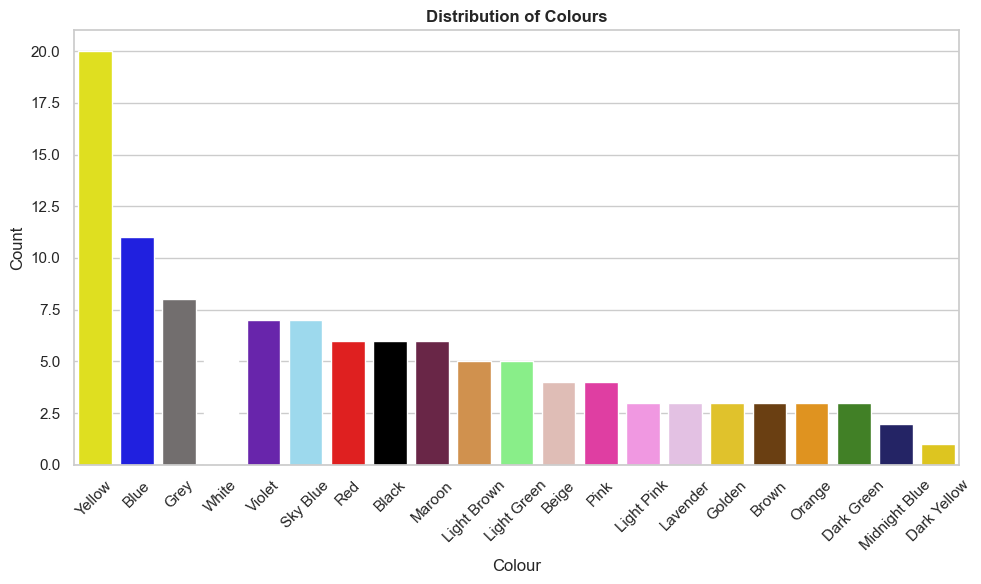

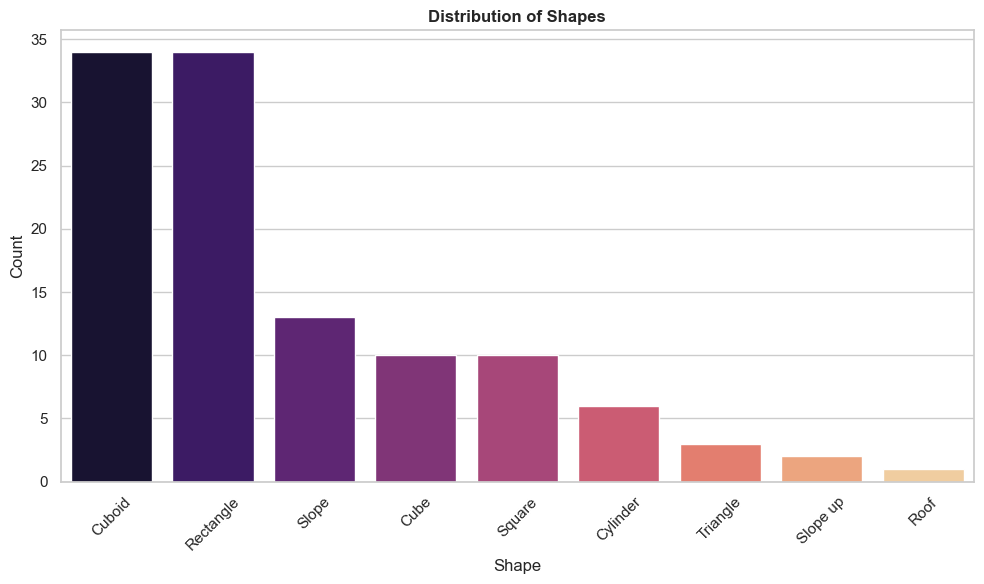

In [12]:
# Set a style for the plots
sns.set(style="whitegrid")

# Create a color palette dictionary from unique colour codes
unique_colors = combined_df[['colour_name', 'colour_code']].drop_duplicates()
color_palette = dict(zip(unique_colors['colour_name'], unique_colors['colour_code']))

# Plot 1: with custom colors for each unique 'colour_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='colour_name', order=combined_df['colour_name'].value_counts().index, palette=color_palette)
plt.title("Distribution of Colours", fontweight="bold")
plt.xlabel("Colour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribution_of_colours.png")
plt.show()

# Plot 2: Distribution of Shapes
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='shape', order=combined_df['shape'].value_counts().index, palette="magma")
plt.title("Distribution of Shapes", fontweight="bold")
plt.xlabel("Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribution_of_shapes.png")
plt.show()

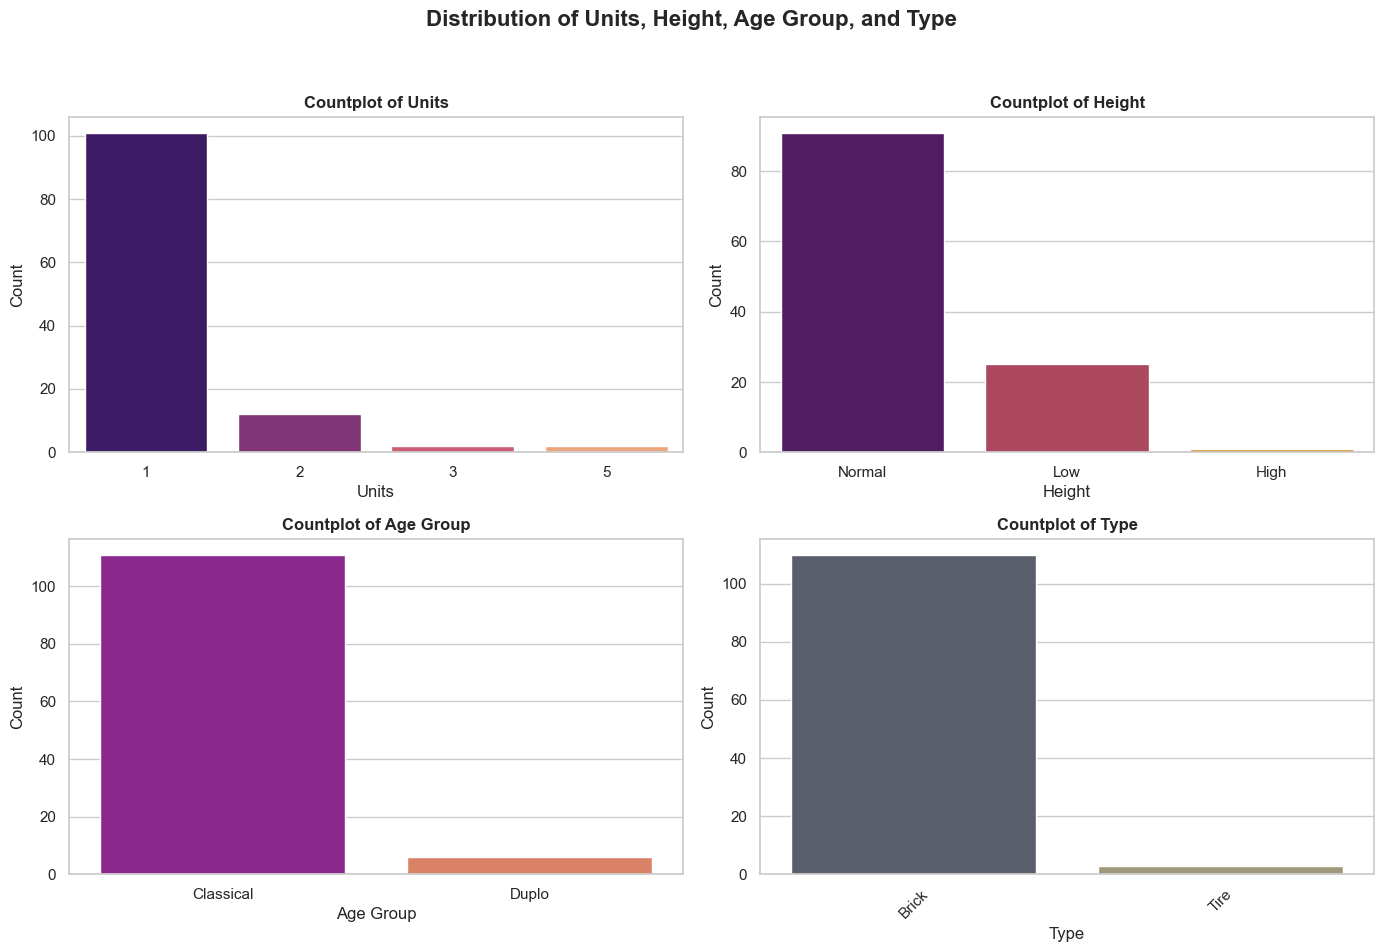

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Units, Height, Age Group, and Type", fontsize=16, fontweight="bold")

# Plot 1: Distribution of Units with magma palette
sns.countplot(data=combined_df, x='units', ax=axes[0, 0], palette="magma")
axes[0, 0].set_title("Countplot of Units", fontweight="bold")
axes[0, 0].set_xlabel("Units")
axes[0, 0].set_ylabel("Count")

# Plot 2: Distribution of Height with inferno palette
sns.countplot(data=combined_df, x='height', ax=axes[0, 1], palette="inferno")
axes[0, 1].set_title("Countplot of Height", fontweight="bold")
axes[0, 1].set_xlabel("Height")
axes[0, 1].set_ylabel("Count")

# Plot 3: Distribution of Age Group with plasma palette
sns.countplot(data=combined_df, x='age_group', ax=axes[1, 0], palette="plasma")
axes[1, 0].set_title("Countplot of Age Group", fontweight="bold")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Count")

# Plot 4: Distribution of Type with cividis palette
sns.countplot(data=combined_df, x='type', ax=axes[1, 1], palette="cividis")
axes[1, 1].set_title("Countplot of Type", fontweight="bold")
axes[1, 1].set_xlabel("Type")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG file
plt.savefig("distribution_of_units_height_age_type.png")
plt.show()